In [2]:
import os
# os.environ['PYTHONPATH']

In [2]:
# import sys
# sys.path.append('/home/mourad/DS/Mosmovi/Mosmovi/')

In [4]:
# import pandas as pd
# import os
# import numpy as np
# from utils import Processing as PR, text_preprocessing as TP
# import multiprocessing as mp
# import seaborn as sns
# import matplotlib.pyplot as plt

# import nltk
# # nltk.download('punkt')
# # nltk.download('stopwords')
# # from textblob import TextBlob
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

# pd.set_option('max_columns', None)
# pd.set_option('display.max_rows', 100)
# from collections import Counter

# import importlib
# import utils.Processing #import the module here, so that it can be reloaded.
# importlib.reload(utils.Processing)

In [3]:
import sys
sys.path.append('/home/mourad/DS/Mosmovi/Mosmovi/')
import pandas as pd
import os
import numpy as np
import multiprocessing as mp
import seaborn as sns
import matplotlib.pyplot as plt
import random

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 100)
from collections import Counter

import unicodedata
import importlib

from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.18f' % x)

In [26]:
def format_csvs_to_df(path):
    file_names = os.listdir(path)
    frames = []
    for n in file_names:
        coordinates = [float(x) for x in n[:-4].split('_')]
        df = pd.read_csv(path + n, sep=';')
        df['coordinates'] = [coordinates] * len(df)
        frames.append(df)
    df_total = pd.concat(frames)
    return df_total

def train_test_split_by_users(df, percentage_users = 0.10):
    """
    Take a dataframe in input and return train and test sets. 
    """
    users_ids = df.author_id
    users_ids = set(df.author_id)
    n_samples = int(len(users_ids)*percentage_users)
    val_users = random.sample(users_ids, n_samples)
    ind = df.author_id.isin(val_users)
    return df.loc[~ind], df.loc[ind]

def rename_coutries(x):
    if x in ['Argentina','Argentine']:
        return 'Argentina'
    elif x in ['Brasile','Brasilien','Brazil','Brésil']:
        return 'Brazil'
    elif x in ['Chile','Chili']:
        return 'Chile'
    elif x in ['Fransk Guyana','French Guiana']:
        return 'French Guiana'
    elif x == 'Bolivie':
        return 'Bolivia'
    else:
        return x

In [7]:
%%time
df = format_csvs_to_df('../../data/Copy of dev_south_america_merged/')
# df = pd.read_csv('../data/formated.csv')
df = df.drop_duplicates(subset=['id'])
print(df.shape)

(6799149, 35)
Wall time: 4min 16s


In [8]:
%%time
df['created_at'] = pd.to_datetime(df['created_at'])
df['lat'], df['long'] = df.coordinates.apply(lambda x : x[0]), df.coordinates.apply(lambda x : x[1])
df['id'] = df['id'].astype(np.int64).astype(str)
df['conversation_id'] = df['conversation_id'].fillna(0).astype(np.int64).astype(str)
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].fillna(0).astype(np.int64).astype(str)
df['author_id'] = df['author_id'].fillna(0).astype(np.int64).astype(str)
# df['geo_country'] = df['geo_country'].apply(lambda x : PR.rename_coutries(x)) 

CPU times: user 19.4 s, sys: 1.22 s, total: 20.6 s
Wall time: 20.6 s


In [27]:
df.geo_country = df.geo_country.apply(lambda x : rename_coutries(x)) 

In [48]:
%%time
df.to_csv('../../data/clean_country_code.csv')

Wall time: 2min 41s


In [9]:
print(df.shape)
# df.id.value_counts()

(6799149, 35)


In [10]:
df.sort_values('id').head()

,lang,id,created_at,text,conversation_id,in_reply_to_user_id,reply_settings,source,possibly_sensitive,geo_place_id,geo_place_type,geo_country,geo_full_name,geo_country_code,geo_geo_type,geo_geo_bbox,geo_geo_properties,author_id,author_profile_image_url,author_username,author_url,author_name,author_created_at,author_verified,author_protected,author_description,retweet_count,reply_count,like_count,quote_count,followers_count,following_count,tweet_count,listed_count,coordinates
2821,es,1356210702650904580,2021-02-01T12:00:03.000Z,Acaba de publicar una foto en Urbanización San...,1356210702650904576.000000000000000000,NaN,everyone,Instagram,True,0176ea0c39765f09,city,Venezuela,"San Francisco, Venezuela",VE,NaN,"[-71.6788483, 10.5293207, -71.6111978, 10.5961...",{},2471875070,https://pbs.twimg.com/profile_images/127973853...,renelop97965381,NaN,INMOBILIARIA ASESOR ESOR René Lopez K.L MARCAIBO,2014-05-01T03:37:13.000Z,False,False,NaN,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,3,3,740,0,"[10.260839184739002, -71.97499804311941]"
2820,es,1356210748637241348,2021-02-01T12:00:14.000Z,El lunes ya me empezó mal 🥳.,1356210748637241344.000000000000000000,NaN,everyone,Twitter for iPhone,False,002e2add0d1ff144,city,Venezuela,"Ciudad Ojeda, Venezuela",VE,NaN,"[-71.3538208, 10.1781855, -71.2887573, 10.2315...",{},116914586,https://pbs.twimg.com/profile_images/134374322...,Saidyaraujo,https://t.co/dShomYDPG4,Saidy,2010-02-23T23:56:07.000Z,False,False,Post Nubila Phoebus. 🌤,0.000000000000000000,1.000000000000000000,0.000000000000000000,0.000000000000000000,796,423,38182,6,"[10.260839184739002, -71.97499804311941]"
4671,es,1356210789477191685,2021-02-01T12:00:24.000Z,@AndresCjn41 @Maridon13335354 Las cajitas Erót...,1353150416972881920.000000000000000000,3057698002.000000000000000000,everyone,Twitter for Android,False,0170d9df339a9451,city,Colombia,"Riohacha, Colombia",CO,NaN,"[-73.3878010031889, 10.907056003372, -72.60212...",{},1351759796983181313,https://pbs.twimg.com/profile_images/135176020...,puntog_tienda,https://t.co/na293qCNhD,PuntoGTienda,2021-01-20T05:14:27.000Z,False,False,Somos los cómplices perfectos del Placer ❤️ En...,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,37,24,22,0,"[11.343964420474848, -72.29185226444467]"
3482,es,1356210882355802114,2021-02-01T12:00:46.000Z,"Pues crealooo,porque no me leí nada de eso pro...",1356210882355802112.000000000000000000,NaN,everyone,Twitter for iPhone,False,01030be40ff4ff39,city,Colombia,"Sahagún, Colombia",CO,NaN,"[-75.5609759988304, 8.56956300178352, -75.2774...",{},1115724327435956224,https://pbs.twimg.com/profile_images/142053884...,ChechooSerpa,NaN,Chechoo_Serpa🌞.,2019-04-09T21:13:03.000Z,False,False,Estudiante de Derecho 👨‍🎓 ⚖️,0.000000000000000000,0.000000000000000000,3.000000000000000000,0.000000000000000000,63,262,2024,0,"[8.633174749054467, -75.40033266090484]"
5623,es,1356210903507750916,2021-02-01T12:00:51.000Z,Todos esos barberos intensos me dan como ladil...,1356210903507750912.000000000000000000,NaN,everyone,Twitter for Android,False,015e5397777769a2,city,Venezuela,"Mérida, Venezuela",VE,NaN,"[-71.1957474, 8.5660877, -71.1269677, 8.631216]",{},199494386,https://pbs.twimg.com/profile_images/144149718...,mierdatilin,NaN,siyei,2010-10-07T00:46:57.000Z,False,False,Pórtate bien,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,374,145,17710,0,"[8.635918710683876, -71.56215985722785]"


### Duplicates

In [12]:
%%time 
df_dupli_sort = df[df.duplicated('id')].sort_values('id')

CPU times: user 6.51 s, sys: 3.14 s, total: 9.65 s
Wall time: 9.68 s


In [13]:
df_dupli_sort[['id', 'created_at', 'text','geo_geo_bbox', 'coordinates']].head(10)

,id,created_at,text,geo_geo_bbox,coordinates


### Date

In [14]:
%%time
(min(df.created_at), max(df.created_at))

CPU times: user 19.5 s, sys: 4.08 ms, total: 19.5 s
Wall time: 19.5 s


(Timestamp('2021-02-01 12:00:03+0000', tz='UTC'),
 Timestamp('2021-09-01 11:59:59+0000', tz='UTC'))

### Lattitude / Longitude

In [15]:
print('latitude:', min(df.lat), max(df.lat))
print('longitude:',min(df.long), max(df.long))

latitude: -54.69321231192183 12.429793434161136
longitude: -91.17963727111682 -32.18832508121774


### Categorical values count

#### Languages

In [12]:
df.lang.value_counts().keys()

Index(['pt', 'es', 'und', 'en', 'it', 'in', 'tl', 'fr', 'ca', 'eu', 'ht', 'et',
       'tr', 'de', 'lt', 'nl', 'ro', 'hu', 'cs', 'pl', 'cy', 'fi', 'lv', 'is',
       'ja', 'no', 'sv', 'da', 'hi', 'sl', 'vi', 'ko', 'ru', 'ar', 'zh', 'iw',
       'el', 'fa', 'bg', 'uk', 'th', 'bn', 'te', 'kn', 'am', 'ps', 'ta', 'ml',
       'ne', 'my', 'lo', 'mr', 'km', 'ur'],
      dtype='object')

In [17]:
df_lang = pd.DataFrame(df.lang.value_counts()).reset_index().rename(columns={'index':'languages', 'lang':'count'})
df_lang.loc[len(df.index)] = ['other', df_lang.loc[df_lang['count']<280886]['count'].sum()]

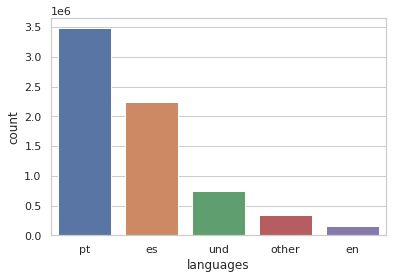

In [18]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="languages", y="count", data=df_lang.sort_values('count', ascending=False).head())

#### Reply settings
everyone, following, mentionedUsers, other

In [19]:
df.reply_settings.value_counts()

everyone          6774157
following           14886
mentionedUsers       3258
other                  11
Name: reply_settings, dtype: int64

#### Source

In [20]:
df.source.value_counts()

Twitter for Android                4798302
Twitter for iPhone                 1713818
Instagram                           232254
Central132                           20881
Foursquare                            5552
                                    ...   
Falcon Social Media Management           1
Twitterrific for iOS                     1
Twitter for  iPhone                      1
Oktopost                                 1
morning_relay                            1
Name: source, Length: 114, dtype: int64

#### Possibly sensitive

In [21]:
df.possibly_sensitive.value_counts()

False    6731228
True       61084
Name: possibly_sensitive, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcddcde5280>,
 [Text(-1.0995610133141953, 0.031073750971842957, ''),
  Text(1.099561015223444, -0.031073683412000556, '')],
 [Text(-0.5997605527168338, 0.016949318711914338, '99%'),
  Text(0.5997605537582421, -0.01694928186109121, '1%')])

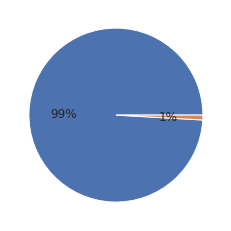

In [22]:
plt.pie(df.possibly_sensitive.value_counts(), autopct='%.0f%%')

#### Geo Country Code

In [14]:
df.geo_country_code.value_counts()

BR    4169298
CO    1013810
AR     541462
VE     427277
CL     323212
EC     173077
PE      55110
UY      36149
BO      20769
PY      13603
TT      11694
GY       4789
AW       4319
GF       2098
SR       1313
CW        390
FK        192
PA         18
Name: geo_country_code, dtype: int64

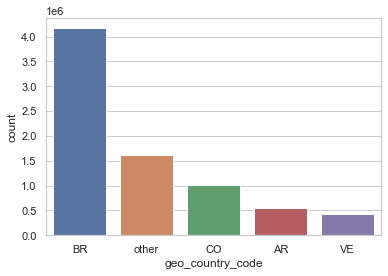

In [15]:
df_cocode = pd.DataFrame(df.geo_country_code.value_counts())\
    .reset_index().rename(columns={'index':'geo_country_code', 'geo_country_code':'count'})
df_cocode.loc[len(df.index)] = ['other', df_cocode.loc[df_cocode['count']<546745]['count'].sum()]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="geo_country_code", y="count", data=df_cocode.sort_values('count', ascending=False).head())

<AxesSubplot:>

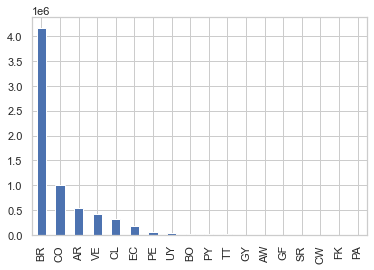

In [22]:
df.geo_country_code.value_counts().plot.bar()

In [24]:
df.geo_country.value_counts()

Brazil                         4169298
Colombia                       1013810
Argentina                       541462
Venezuela                       427277
Chile                           323212
Ecuador                         173077
Peru                             55110
Uruguay                          36149
Paraguay                         13603
Bolivie                          13286
Trinidad and Tobago              11694
Bolivia                           7483
Guyana                            4789
Aruba                             4319
French Guiana                     2098
Suriname                          1313
Curaçao                            390
Falkland Islands (Malvinas)        192
Panama                              18
Name: geo_country, dtype: int64

<AxesSubplot:>

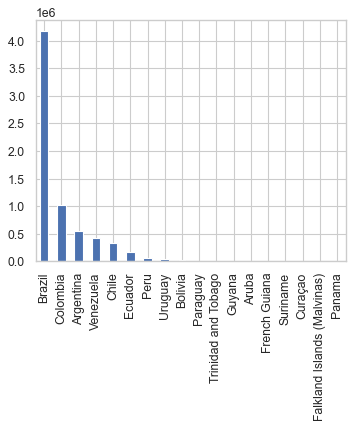

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
df.geo_country.value_counts().plot.bar()

In [27]:
df.geo_full_name.value_counts()

Rio de Janeiro, Brésil      437618
São Paulo, Brésil           400094
Bogotá, D.C., Colombia      298762
Medellín, Colombia           93390
Córdoba, Argentina           92947
                             ...  
Carvoeira, Florianópolis         1
Centrinho da Lagoa               1
Caminhada na Raul Lopes          1
Vitoria Eco Office               1
Parque Croacia                   1
Name: geo_full_name, Length: 27733, dtype: int64

In [28]:
df.geo_geo_properties.value_counts()

{}    6804926
Name: geo_geo_properties, dtype: int64

In [29]:
df.author_verified.value_counts()

False    6765395
True       40017
Name: author_verified, dtype: int64

In [30]:
df.author_protected.value_counts()

False    6805412
Name: author_protected, dtype: int64

In [31]:
df.author_protected.value_counts()

False    6805412
Name: author_protected, dtype: int64

### NLP

In [36]:
df_nlp = df[['lang', 'id','text','geo_country_code','coordinates', 'author_description','author_username','author_name', 'geo_country', 'geo_full_name']]


### Length of text

In [37]:
df_nlp['length_text'] = df_nlp['text'].apply(lambda x: len(str(x)))

<ipython-input-37-ba089dfa894a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['length_text'] = df_nlp['text'].apply(lambda x: len(str(x)))


In [38]:
df_nlp.loc[df_nlp['length_text']>400]

,lang,id,text,geo_country_code,coordinates,author_description,author_username,author_name,geo_country,geo_full_name,length_text
1566,es,1430654179912077315,@EmpresaaguaEc @TeddyMackliffE @MinGobiernoEc ...,EC,"[-0.5746843850928224, -80.33635864194427]",Ing. Agrícola. Master en Riego y Drenaje. Mi ...,LuisVeraVera27,Luis Vera Vera,Ecuador,"Bolivar, Ecuador",440
1380,es,1423966589402161160,@ACampanaRemache @CONAIE_Ecuador @ApawkiCastro...,EC,"[-0.5748139026285499, -77.62553883210545]","Riobambeña de pura cepa,viviendo en Quito,Ing ...",PattyLsq,Patricia León,Ecuador,"Mejia, Ecuador",454
1967,es,1424018148362264577,@ProfHoax__ @ACampanaRemache @CONAIE_Ecuador @...,EC,"[-1.1160860383868805, -80.89199749361593]","...trabajo en época de estudiante, W.S.U. allá...",diegoJfranco,Diego Franco,Ecuador,"Manta, Ecuador",470
2750,und,1432416949787582470,@Crazy_Judit @Pepi73459511 @kakaufloripa @AnaM...,EC,"[-1.1160860383868805, -80.89199749361593]",Amo la vida!!,gdelgado68,glenda delgado,Ecuador,"Portoviejo, Ecuador",474
2919,es,1429893110881001476,@AKDEFM1 @Estrelladeluz74 @HermosillaPaqui @Cr...,EC,"[-1.1160860383868805, -80.89199749361593]",Amo la vida!!,gdelgado68,glenda delgado,Ecuador,"Portoviejo, Ecuador",427
...,...,...,...,...,...,...,...,...,...,...,...
2956,es,1423043003472560140,@FannyGuilarte @razapatac @ArvelaizRaquel @fra...,VE,"[9.726747117144752, -62.47937996970446]",Nací en el extremo del Golfo de Paría. un día ...,OrlandoBottin19,Orlando Bottini,Venezuela,"Maturín, Venezuela",474
2968,es,1422992599074451462,@FannyGuilarte @yamilaudio @elcuervo2022 @fran...,VE,"[9.726747117144752, -62.47937996970446]",Nací en el extremo del Golfo de Paría. un día ...,OrlandoBottin19,Orlando Bottini,Venezuela,"Maturín, Venezuela",423
2988,es,1422930518706999302,@FannyGuilarte @yamilaudio @elcuervo2022 @fran...,VE,"[9.726747117144752, -62.47937996970446]",Nací en el extremo del Golfo de Paría. un día ...,OrlandoBottin19,Orlando Bottini,Venezuela,"Maturín, Venezuela",420
3048,es,1422549880741023747,@Katiuskavzla_16 @FannyGuilarte @razapatac @ah...,VE,"[9.726747117144752, -62.47937996970446]",Nací en el extremo del Golfo de Paría. un día ...,OrlandoBottin19,Orlando Bottini,Venezuela,"Maturín, Venezuela",405


In [34]:
df_nlp['length_text'].value_counts()

23     159251
25     101545
35      97285
36      96258
38      95370
        ...  
992         1
984         1
991         1
993         1
580         1
Name: length_text, Length: 981, dtype: int64

Text(0, 0.5, 'Count in M')

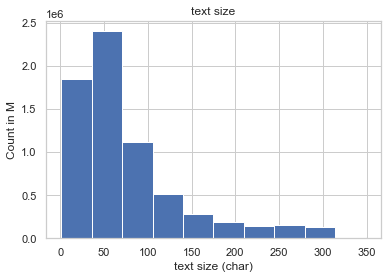

In [47]:
# ax = df2.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')


ax = df_nlp.loc[df_nlp['length_text']<350]['length_text'].plot.hist(title='text size')
ax.set_xlabel("text size (char)")
ax.set_ylabel("Count in M")

In [36]:
%%time
# df_nlp['tokenized_text'] = df_nlp.text.apply(lambda x : word_tokenize(str(x)))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [49]:
from nltk.tokenize import TweetTokenizer

def toto(x):
    tweet_tokenizer = TweetTokenizer()
    return tweet_tokenizer.tokenize(str(x))

In [50]:
%%time
p = mp.Pool(mp.cpu_count()-2) # Data parallelism Object
df_nlp['tokenized_text'] = p.map(toto, df_nlp['text']) 


CPU times: user 39.3 s, sys: 5.93 s, total: 45.3 s
Wall time: 53.8 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
' '.join(df_nlp['tokenized_text'].iloc[2])

'Lo más sexi que verás este día bebé 😉 #ghigoflow #papirey #soymetedor en Ciudad Trinidad , El Beni , Bolivia https://t.co/BqdNZofb8n'

At the end, tokenizing and counting tokens is useless if we use character level to do our prediction. 

## Test and draft

In [39]:
# tokens = set()
# for x in df_nlp['tokenized_text']:
#     tokens = tokens.union(set(x))
# print(len(tokens))

In [71]:
def union_tok(list_of_lists):
    tokens = set().union(*list_of_lists)
#     for x in list_of_set:
#         tokens = tokens.union(set(x))
# #         print(set(x).union(tokens))
    return tokens
        

In [67]:
set().union(*df_nlp['tokenized_text'].iloc[:10])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [74]:
union_tok(df_nlp['tokenized_text'].iloc[:10])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [81]:
set.union(*[set(x) for x in df_nlp['tokenized_text'].iloc[:10]])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [83]:
%%time
pool = mp.Pool(processes=int(os.cpu_count()/2))
tokens = pool.map(union_tok, [set(x) for x in df_nlp['tokenized_text']]) # Returns a list of lists

CPU times: user 1min 12s, sys: 15.7 s, total: 1min 28s
Wall time: 1min 29s


In [88]:
len(set().union(tokens))

TypeError: unhashable type: 'set'

In [ ]:
for x, y in df_nlp.iloc[100:110].iterrows():
    print(x, y.text)
    print(word_tokenize(y.text))
    print('\n')

In [ ]:
%%time
df_nlp.text = df_nlp.text.apply(lambda x : TP.preprocess(str(x))) 

In [ ]:
for x, y in df_nlp.iloc[100:110].iterrows():
    print(x, y.text)
    print(x, TP.remove_URL(y.text))
    print('--')
    print(word_tokenize(y.text)[-4:])
    print(y.geo_full_name)
    print(y.author_name, y.author_username)
    print('\n')


In [ ]:
word_tokenize(df_nlp.text.iloc[0])

In [ ]:
df_nlp['']